# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import re
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('data.csv')
df

,Label (Grouping),Alabama!!Total!!Estimate,Alabama!!Total!!Margin of Error,Alabama!!Percent!!Estimate,Alabama!!Percent!!Margin of Error,Alabama!!Male!!Estimate,Alabama!!Male!!Margin of Error,Alabama!!Percent Male!!Estimate,Alabama!!Percent Male!!Margin of Error,Alabama!!Female!!Estimate,...,Puerto Rico!!Percent!!Estimate,Puerto Rico!!Percent!!Margin of Error,Puerto Rico!!Male!!Estimate,Puerto Rico!!Male!!Margin of Error,Puerto Rico!!Percent Male!!Estimate,Puerto Rico!!Percent Male!!Margin of Error,Puerto Rico!!Female!!Estimate,Puerto Rico!!Female!!Margin of Error,Puerto Rico!!Percent Female!!Estimate,Puerto Rico!!Percent Female!!Margin of Error
0,AGE BY EDUCATIONAL ATTAINMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Population 18 to 24 years,"488,344","±5,417",(X),(X),"245,043","±4,090",(X),(X),"243,301",...,(X),(X),"151,694","±2,147",(X),(X),"147,321","±2,056",(X),(X)
2,Less than high school graduate,"58,089","±4,934",11.9%,±1.0,"34,613","±3,501",14.1%,±1.4,"23,476",...,7.2%,±0.8,"12,355","±1,852",8.1%,±1.2,"9,180","±1,829",6.2%,±1.2
3,High school graduate (includes equival...,"176,620","±8,332",36.2%,±1.6,"98,665","±4,827",40.3%,±1.9,"77,955",...,28.7%,±1.5,"52,446","±3,422",34.6%,±2.2,"33,480","±3,097",22.7%,±2.1
4,Some college or associate's degree,"208,994","±8,746",42.8%,±1.8,"93,866","±4,989",38.3%,±1.9,"115,128",...,52.5%,±1.5,"74,609","±3,478",49.2%,±2.1,"82,322","±3,646",55.9%,±2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Less than high school graduate,"28,515","±1,683",(X),(X),"32,089","±1,079",(X),(X),"22,016",...,(X),(X),"13,178","±1,192",(X),(X),"10,864","±2,075",(X),(X)
64,High school graduate (includes equival...,"34,127","±1,153",(X),(X),"41,600",±795,(X),(X),"26,337",...,(X),(X),"17,022",±409,(X),(X),"13,232",±836,(X),(X)
65,Some college or associate's degree,"39,501",±944,(X),(X),"51,002","±1,153",(X),(X),"31,607",...,(X),(X),"22,270",±832,(X),(X),"17,092",±523,(X),(X)
66,Bachelor's degree,"56,640","±1,667",(X),(X),"71,465","±2,183",(X),(X),"46,955",...,(X),(X),"30,686","±1,752",(X),(X),"26,274",±752,(X),(X)


In [3]:
df.columns

Index(['Label (Grouping)', 'Alabama!!Total!!Estimate',
       'Alabama!!Total!!Margin of Error', 'Alabama!!Percent!!Estimate',
       'Alabama!!Percent!!Margin of Error', 'Alabama!!Male!!Estimate',
       'Alabama!!Male!!Margin of Error', 'Alabama!!Percent Male!!Estimate',
       'Alabama!!Percent Male!!Margin of Error', 'Alabama!!Female!!Estimate',
       ...
       'Puerto Rico!!Percent!!Estimate',
       'Puerto Rico!!Percent!!Margin of Error', 'Puerto Rico!!Male!!Estimate',
       'Puerto Rico!!Male!!Margin of Error',
       'Puerto Rico!!Percent Male!!Estimate',
       'Puerto Rico!!Percent Male!!Margin of Error',
       'Puerto Rico!!Female!!Estimate', 'Puerto Rico!!Female!!Margin of Error',
       'Puerto Rico!!Percent Female!!Estimate',
       'Puerto Rico!!Percent Female!!Margin of Error'],
      dtype='object', length=625)

In [4]:
'Estimate' in 'Alabama!!Percent!!Estimate'

True

In [5]:
total=[]
states=[]
for col in df.columns:
    if 'Total' in col and 'Estimate' in col:
        total.append(col)
        

In [6]:
educational_level=df[total]

In [7]:
educational_level.columns = [re.findall(r"^(.*?)(?=\!)", col)[0] for col in educational_level.columns]

In [8]:
educational_level=educational_level.transpose()

In [9]:
col_name=[]
for i in np.array(df['Label (Grouping)']):
    cleaned_string = re.sub(r'\xa0+|^ +| +$', '', i)
    col_name.append(cleaned_string)

In [10]:
educational_level.columns=col_name

In [11]:
educational_level=educational_level.drop(educational_level.columns[0], axis=1)

In [12]:
educational_level.columns

Index(['Population 18 to 24 years', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college or associate's degree', 'Bachelor's degree or higher',
       'Population 25 years and over', 'Less than 9th grade',
       '9th to 12th grade, no diploma',
       'High school graduate (includes equivalency)',
       'Some college, no degree', 'Associate's degree', 'Bachelor's degree',
       'Graduate or professional degree', 'High school graduate or higher',
       'Bachelor's degree or higher', 'Population 25 to 34 years',
       'High school graduate or higher', 'Bachelor's degree or higher',
       'Population 35 to 44 years', 'High school graduate or higher',
       'Bachelor's degree or higher', 'Population 45 to 64 years',
       'High school graduate or higher', 'Bachelor's degree or higher',
       'Population 65 years and over', 'High school graduate or higher',
       'Bachelor's degree or higher',
       'RACE AND HISPANIC OR LAT

In [13]:
educational_level = educational_level.loc[:, :'RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT'].drop(educational_level.columns[-2:], axis=1)

In [14]:
educational_level

,Population 18 to 24 years,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,Population 25 years and over,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency),"Some college, no degree",...,Population 35 to 44 years,High school graduate or higher,Bachelor's degree or higher,Population 45 to 64 years,High school graduate or higher,Bachelor's degree or higher,Population 65 years and over,High school graduate or higher,Bachelor's degree or higher,RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT
Alabama,"488,344","58,089","176,620","208,994","44,641","3,474,924","118,034","271,263","1,057,155","716,144",...,"632,416","562,939","202,288","1,277,343","1,132,566","365,267","913,013","790,146","236,624",NaN
Alaska,"68,620","7,801","33,068","22,097","5,654","489,218","10,950","21,719","142,455","116,078",...,"104,911","98,920","33,975","168,933","156,577","51,058","101,474","94,131","30,534",NaN
Arizona,"717,938","102,059","256,195","281,101","78,583","5,053,656","241,467","306,781","1,202,946","1,160,936",...,"926,470","818,205","323,779","1,726,541","1,517,145","558,646","1,381,954","1,244,972","448,159",NaN
Arkansas,"292,181","37,246","109,301","117,675","27,959","2,057,624","82,740","140,697","705,670","438,076",...,"387,640","349,937","116,022","745,265","655,777","178,560","538,842","470,509","121,339",NaN
California,"3,663,563","339,703","1,308,667","1,553,990","461,203","26,866,773","2,376,805","1,738,878","5,506,855","5,192,854",...,"5,395,388","4,650,072","2,198,152","9,568,024","7,798,413","3,310,766","6,158,902","5,036,014","2,075,419",NaN
Colorado,"544,827","59,947","187,892","212,694","84,294","4,084,004","114,089","170,479","823,109","762,179",...,"860,355","792,774","425,135","1,392,046","1,280,829","612,473","915,661","858,359","382,208",NaN
Connecticut,"350,593","33,078","99,270","150,389","67,856","2,545,188","100,376","115,659","660,047","405,693",...,"460,313","422,321","210,590","970,653","891,663","401,823","663,712","589,841","241,980",NaN
Delaware,"86,128","11,470","33,298","32,364","8,996","724,041","18,944","38,980","204,385","135,691",...,"125,307","114,063","50,585","255,991","236,022","88,168","212,180","194,953","73,696",NaN
District of Columbia,"68,328","4,435","13,678","28,522","21,693","479,231","10,203","20,152","64,543","55,085",...,"111,221","107,309","81,821","135,403","121,324","75,462","87,354","78,084","42,244",NaN
Florida,"1,845,519","229,379","638,736","754,968","222,436","16,104,410","679,435","943,495","4,363,609","2,955,638",...,"2,799,499","2,528,694","1,053,736","5,726,736","5,161,026","1,898,957","4,794,414","4,235,312","1,541,145",NaN


In [15]:
column_counts = {}
new_columns=[]
for column in educational_level.columns:
    if column in column_counts:
        column_counts[column] += 1
        new_column_name = f"{column}_{column_counts[column]}"
    else:
        column_counts[column] = 0
        new_column_name = column
    new_columns.append(new_column_name)

# Assign new column names to the DataFrame
educational_level.columns = new_columns

In [16]:
educational_level.columns

Index(['Population 18 to 24 years', 'Less than high school graduate',
       'High school graduate (includes equivalency)',
       'Some college or associate's degree', 'Bachelor's degree or higher',
       'Population 25 years and over', 'Less than 9th grade',
       '9th to 12th grade, no diploma',
       'High school graduate (includes equivalency)_1',
       'Some college, no degree', 'Associate's degree',
       'High school graduate or higher', 'Bachelor's degree or higher_1',
       'Population 25 to 34 years', 'High school graduate or higher_1',
       'Bachelor's degree or higher_2', 'Population 35 to 44 years',
       'High school graduate or higher_2', 'Bachelor's degree or higher_3',
       'Population 45 to 64 years', 'High school graduate or higher_3',
       'Bachelor's degree or higher_4', 'Population 65 years and over',
       'High school graduate or higher_4', 'Bachelor's degree or higher_5',
       'RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT'],
   

In [17]:
cols=[]
for col in educational_level.columns:
    if 'years' not in col: 
        cols.append(col)

In [18]:
educational_level=educational_level[cols]
educational_level

,Less than high school graduate,High school graduate (includes equivalency),Some college or associate's degree,Bachelor's degree or higher,Less than 9th grade,"9th to 12th grade, no diploma",High school graduate (includes equivalency)_1,"Some college, no degree",Associate's degree,High school graduate or higher,Bachelor's degree or higher_1,High school graduate or higher_1,Bachelor's degree or higher_2,High school graduate or higher_2,Bachelor's degree or higher_3,High school graduate or higher_3,Bachelor's degree or higher_4,High school graduate or higher_4,Bachelor's degree or higher_5,RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT
Alabama,"58,089","176,620","208,994","44,641","118,034","271,263","1,057,155","716,144","311,537","3,085,627","1,000,791","599,976","196,612","562,939","202,288","1,132,566","365,267","790,146","236,624",NaN
Alaska,"7,801","33,068","22,097","5,654","10,950","21,719","142,455","116,078","48,370","456,549","149,646","106,921","34,079","98,920","33,975","156,577","51,058","94,131","30,534",NaN
Arizona,"102,059","256,195","281,101","78,583","241,467","306,781","1,202,946","1,160,936","475,387","4,505,408","1,666,139","925,086","335,555","818,205","323,779","1,517,145","558,646","1,244,972","448,159",NaN
Arkansas,"37,246","109,301","117,675","27,959","82,740","140,697","705,670","438,076","167,634","1,834,187","522,807","357,964","106,886","349,937","116,022","655,777","178,560","470,509","121,339",NaN
California,"339,703","1,308,667","1,553,990","461,203","2,376,805","1,738,878","5,506,855","5,192,854","2,115,440","22,751,090","9,935,941","5,266,591","2,351,604","4,650,072","2,198,152","7,798,413","3,310,766","5,036,014","2,075,419",NaN
Colorado,"59,947","187,892","212,694","84,294","114,089","170,479","823,109","762,179","339,016","3,799,436","1,875,132","867,474","455,316","792,774","425,135","1,280,829","612,473","858,359","382,208",NaN
Connecticut,"33,078","99,270","150,389","67,856","100,376","115,659","660,047","405,693","197,009","2,329,153","1,066,404","425,328","212,011","422,321","210,590","891,663","401,823","589,841","241,980",NaN
Delaware,"11,470","33,298","32,364","8,996","18,944","38,980","204,385","135,691","61,657","666,117","264,384","121,079","51,935","114,063","50,585","236,022","88,168","194,953","73,696",NaN
District of Columbia,"4,435","13,678","28,522","21,693","10,203","20,152","64,543","55,085","15,974","448,876","313,274","142,159","113,747","107,309","81,821","121,324","75,462","78,084","42,244",NaN
Florida,"229,379","638,736","754,968","222,436","679,435","943,495","4,363,609","2,955,638","1,643,815","14,481,480","5,518,418","2,556,448","1,024,580","2,528,694","1,053,736","5,161,026","1,898,957","4,235,312","1,541,145",NaN


In [19]:
educational_level = educational_level.replace(',', '', regex=True).astype(float)
educational_level.fillna(0, inplace=True)
less_than_high_school=np.array([])
high_school=np.array([])
bachelor_or_higher=np.array([])
some_college=np.array([])

In [20]:
less_than_high_school=np.zeros(52)
high_school=np.zeros(52)
bachelor_or_higher=np.zeros(52)
some_college=np.zeros(52)

In [21]:
for i in educational_level.columns:
    col_name=i.lower()
    print(i)
    if col_name.startswith("less"):
        less_than_high_school+= np.array(educational_level[i])
    elif col_name.startswith("high") or col_name.startswith("9th"):
        high_school+=np.array(educational_level[i])
    elif col_name.startswith("bachelor's"):
        bachelor_or_higher+= np.array(educational_level[i])
    else:
        some_college += np.array(educational_level[i])

Less than high school graduate
High school graduate (includes equivalency)
Some college or associate's degree
Bachelor's degree or higher
Less than 9th grade
9th to 12th grade, no diploma
High school graduate (includes equivalency)_1
Some college, no degree
Associate's degree
High school graduate or higher
Bachelor's degree or higher_1
High school graduate or higher_1
Bachelor's degree or higher_2
High school graduate or higher_2
Bachelor's degree or higher_3
High school graduate or higher_3
Bachelor's degree or higher_4
High school graduate or higher_4
Bachelor's degree or higher_5
RACE AND HISPANIC OR LATINO ORIGIN BY EDUCATIONAL ATTAINMENT


In [22]:
educational_level['some_college']=some_college
educational_level['less_than_high_school']=less_than_high_school
educational_level['high_school']=high_school
educational_level['bachelor_or_higher']=bachelor_or_higher

In [23]:
educational_level=educational_level[['less_than_high_school','high_school','some_college','bachelor_or_higher']]

In [24]:
educational_level=educational_level.astype(int)
educational_level

,less_than_high_school,high_school,some_college,bachelor_or_higher
Alabama,176123,7676292,1236675,2046223
Alaska,18751,1110340,186545,304946
Arizona,343526,10776738,1917424,3410861
Arkansas,119986,4624042,723385,1073573
California,2716508,54056580,8862284,20333085
Colorado,174036,8780352,1313889,3834558
Connecticut,133454,5533282,753091,2200664
Delaware,30414,1608897,229712,537764
District of Columbia,14638,996125,99581,648241
Florida,908814,34908800,5354421,11259272


In [25]:
educational_level = educational_level.drop(columns=['less_than_high_school', 'high_school', 'some_college'])
educational_level

,bachelor_or_higher
Alabama,2046223
Alaska,304946
Arizona,3410861
Arkansas,1073573
California,20333085
Colorado,3834558
Connecticut,2200664
Delaware,537764
District of Columbia,648241
Florida,11259272


In [26]:
population = pd.read_csv('population.csv')
rate = []
for i in range(52):
    rate.append(educational_level['bachelor_or_higher'][i]/population['2022'][i])
educational_level['bachelor_and_higher_rate'] = rate
educational_level = educational_level.drop(columns=['bachelor_or_higher'])
educational_level

,bachelor_and_higher_rate
Alabama,0.403284
Alaska,0.415868
Arizona,0.463075
Arkansas,0.352407
California,0.520819
Colorado,0.656486
Connecticut,0.609821
Delaware,0.527499
District of Columbia,0.966155
Florida,0.506137


In [27]:
educational_level.to_csv('educational_level.csv', index=False)

# Exploratory Data Analysis

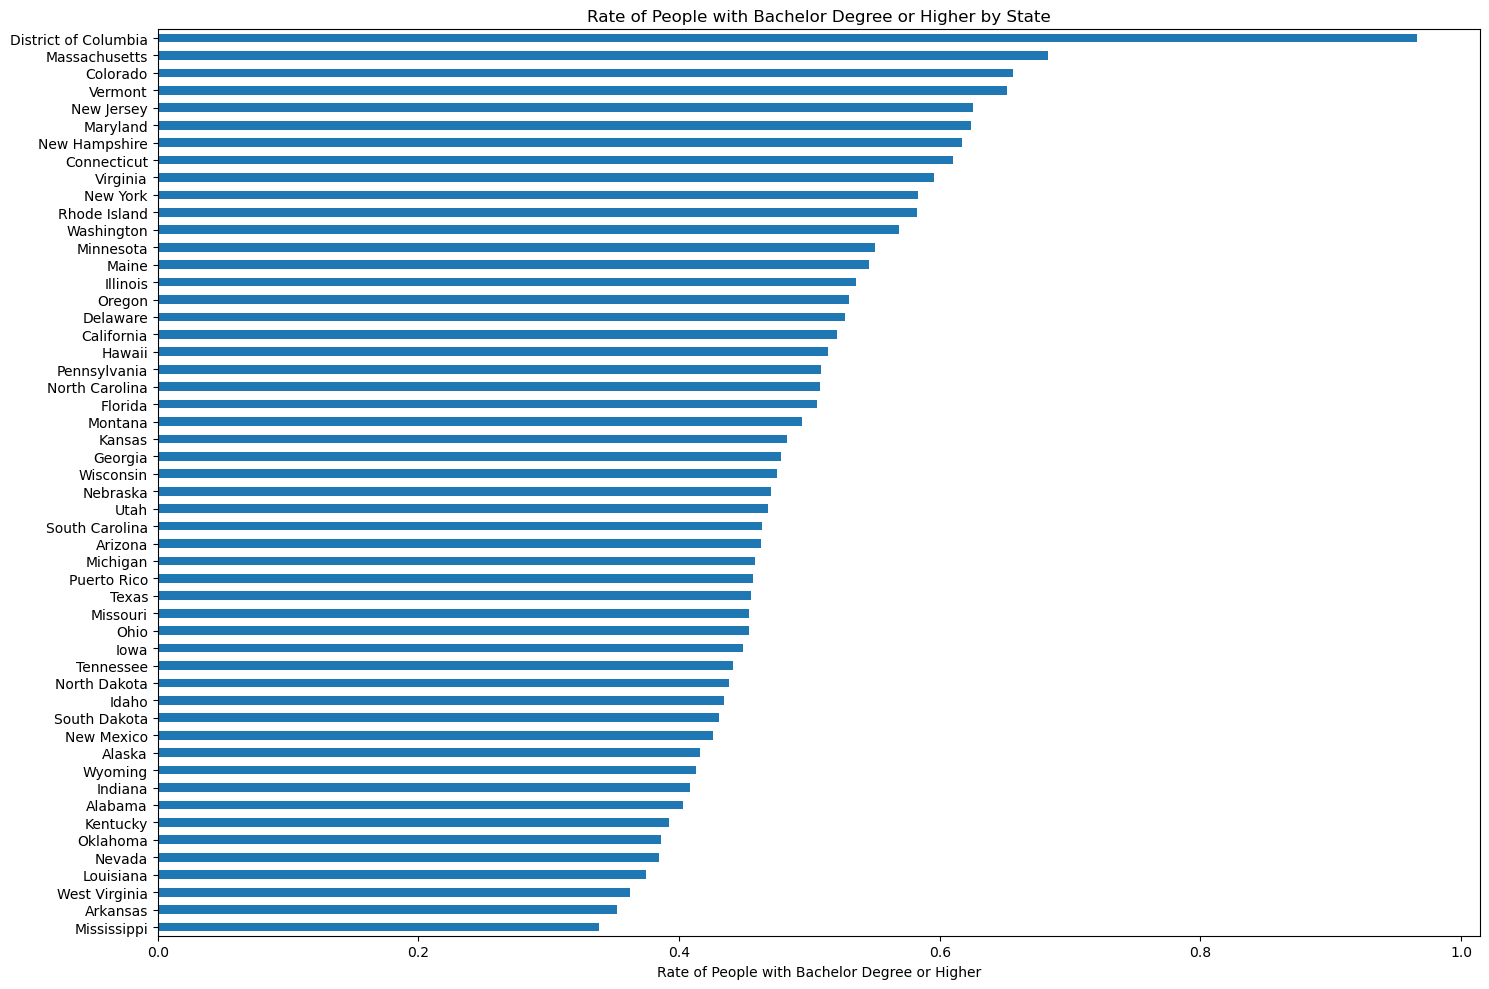

In [28]:
plt.figure(figsize=(15, 10))
educational_level['bachelor_and_higher_rate'].sort_values().plot(kind='barh')
plt.xlabel('Rate of People with Bachelor Degree or Higher')
plt.title('Rate of People with Bachelor Degree or Higher by State')
plt.tight_layout()
plt.show()

In [29]:
# Read employment dataframe
employment_rate = pd.read_csv('employment_rate.csv')
employment_rate

,State,Employment rate
0,Alabama,0.424628
1,Alaska,0.449819
2,Arizona,0.429169
3,Arkansas,0.444172
4,California,0.466588
5,Colorado,0.495780
6,Connecticut,0.468819
7,Delaware,0.471368
8,District of Columbia,1.149090
9,Florida,0.436107


In [30]:
educational_level['Employment_rate'] = np.array(employment_rate['Employment rate'])
combined_data = educational_level

In [31]:
# Display the first few rows to verify
combined_data.head()

,bachelor_and_higher_rate,Employment_rate
Alabama,0.403284,0.424628
Alaska,0.415868,0.449819
Arizona,0.463075,0.429169
Arkansas,0.352407,0.444172
California,0.520819,0.466588


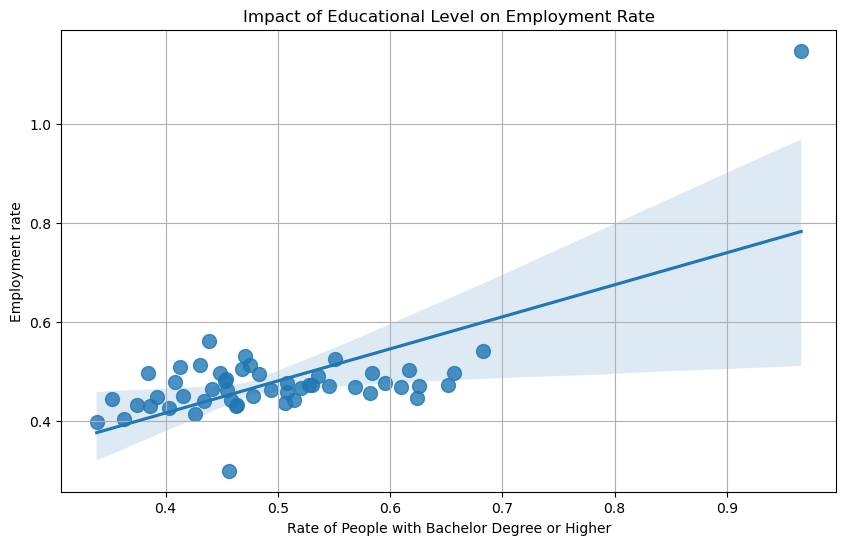

In [32]:
# Plotting the regression plot for educational level vs total employment
plt.figure(figsize=(10, 6))
sns.regplot(data=combined_data, x='bachelor_and_higher_rate', y='Employment_rate', scatter_kws={'s': 100})
plt.title('Impact of Educational Level on Employment Rate')
plt.xlabel('Rate of People with Bachelor Degree or Higher')
plt.ylabel('Employment rate')
plt.grid(True)
plt.show()

The regression line has a positive slope, which suggests that there is a positive correlation between the number of people with a bachelor's degree or higher and the employment rate. This indicates that as the number of individuals with higher education increases, the employment rate tends to increase as well.

In [35]:
ols_model = smf.ols('Employment_rate ~ bachelor_and_higher_rate', data = combined_data).fit()
summary = ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:        Employment_rate   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     41.09
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           5.03e-08
Time:                        15:18:49   Log-Likelihood:                 60.284
No. Observations:                  52   AIC:                            -116.6
Df Residuals:                      50   BIC:                            -112.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

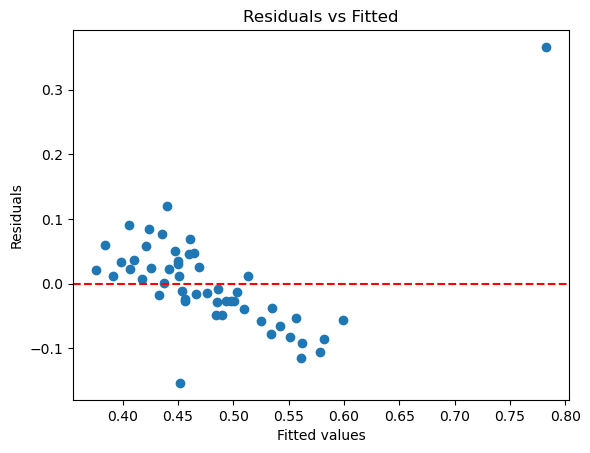

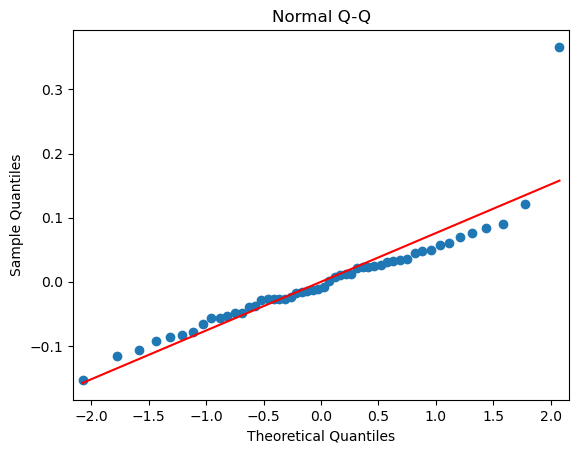

Durbin-Watson statistic: 1.8693275223841053


In [39]:
y = combined_data['Employment_rate']
X = sm.add_constant(combined_data['bachelor_and_higher_rate'])

# Fit the OLS model using statsmodels
ols_model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = ols_model.resid

plt.scatter(ols_model.fittedvalues, residuals)
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line ='s')
plt.title('Normal Q-Q')
plt.show()

from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw)

In [ ]:
combined_data['Employed'] = (combined_data['Employment_rate'] > 0.5).astype(int)
combined_data['bachelor_and_higher_rate'] = (combined_data['bachelor_and_higher_rate'] > 0.5).astype(int)

In [ ]:
X = combined_data['bachelor_and_higher_rate']
y = combined_data['Employed'] 

In [ ]:
X = sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()
logit_model_summary = logit_model.summary()
print(logit_model_summary)

In [ ]:
coefficient = -0.1178
odds_ratio = np.exp(coefficient)
print("Odds Ratio:", odds_ratio)